In [ ]:
pip install python-rake

In [ ]:
pip install scikit-plot

In [ ]:
import pandas as pd
import RAKE
import operator
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import wordcloud as w
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,make_scorer,classification_report,accuracy_score
import scikitplot as skplt
from sklearn import svm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
job_input = '/content/marketing_sample_for_naukri_com-jobs__20190701_20190830__30k_data.csv'
df_job = pd.read_csv(job_input)
df_job.head()

In [ ]:
df_job.drop('Uniq Id',axis=1, inplace= True)

In [ ]:
df_job.drop('Crawl Timestamp',axis=1, inplace= True)
df_job.drop('Job Salary',axis=1, inplace= True)
df_job.drop('Job Experience Required',axis=1, inplace= True)
df_job.drop('Role Category',axis=1, inplace= True)
df_job.drop('Location',axis=1, inplace= True)
df_job.drop('Functional Area',axis=1, inplace= True)
#df_job.drop('Industry',axis=1, inplace= True)

In [279]:
df_job.head()

,Job Title,Key Skills,Role,Label
1,Online Bidding Executive,pre sales| closing| software knowledge| clien...,Sales Executive/Officer,Full Stack Web Developer
3,Technical Support,Technical Support,Technical Support Engineer,DataBase Administrator
4,Software Test Engineer -hyderabad,manual testing| test engineering| test cases|...,Testing Engineer,Backend Developer
5,Opening For Adobe Analytics Specialist,adobe experience manager| digital| digital ma...,System Analyst,Cloud Architect
7,Opportunity For Azure Devops Architect For Hy...,TFS| Azure| Git| VSTS| Docker| DynaTrace| Spl...,Technical Architect,Cloud Architect


In [280]:
df_job.drop_duplicates()
df_job.head(5)

,Job Title,Key Skills,Role,Label
1,Online Bidding Executive,pre sales| closing| software knowledge| clien...,Sales Executive/Officer,Full Stack Web Developer
3,Technical Support,Technical Support,Technical Support Engineer,DataBase Administrator
4,Software Test Engineer -hyderabad,manual testing| test engineering| test cases|...,Testing Engineer,Backend Developer
5,Opening For Adobe Analytics Specialist,adobe experience manager| digital| digital ma...,System Analyst,Cloud Architect
7,Opportunity For Azure Devops Architect For Hy...,TFS| Azure| Git| VSTS| Docker| DynaTrace| Spl...,Technical Architect,Cloud Architect


In [281]:
# check to see if there are any missing values
print(df_job.isnull().values.any())

# as it is true, check number of missing values in each row
df_job.isna().sum() 

False


Job Title     0
Key Skills    0
Role          0
Label         0
dtype: int64

In [282]:
# drop all rows that have NaN values
df_job.dropna(inplace=True)

In [283]:
# check for NaN value again
df_job.isna().sum()

Job Title     0
Key Skills    0
Role          0
Label         0
dtype: int64

In [285]:
df_job["Job Title"].value_counts()[:5]

 PHP Developer        88
 Android Developer    55
 Java Developer       54
 Software Engineer    49
 Dot Net Developer    46
Name: Job Title, dtype: int64

In [286]:
df_job.head(5)

,Job Title,Key Skills,Role,Label
1,Online Bidding Executive,pre sales| closing| software knowledge| clien...,Sales Executive/Officer,Full Stack Web Developer
3,Technical Support,Technical Support,Technical Support Engineer,DataBase Administrator
4,Software Test Engineer -hyderabad,manual testing| test engineering| test cases|...,Testing Engineer,Backend Developer
5,Opening For Adobe Analytics Specialist,adobe experience manager| digital| digital ma...,System Analyst,Cloud Architect
7,Opportunity For Azure Devops Architect For Hy...,TFS| Azure| Git| VSTS| Docker| DynaTrace| Spl...,Technical Architect,Cloud Architect


In [287]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_job['Job Title'].values)
print(X.shape)
analyze = vectorizer.build_analyzer()
features = vectorizer.get_feature_names()

(9841, 3523)


In [288]:
# within cluster sum of squares
wcss = []
for i in range(1, 15):
  kmeans=KMeans(n_clusters = i, init = 'k-means++', random_state = 42, max_iter= 600, n_init=1)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

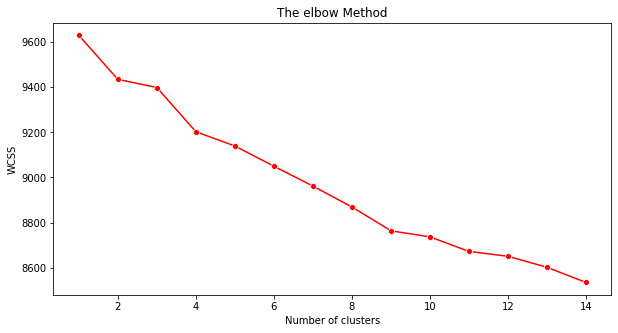

In [289]:
#plotting the graph
plt.figure(figsize=(10,5))
sns.lineplot(range(1,15),wcss,marker= 'o',color='red')
plt.title('The elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [290]:
true_k = 13
model = KMeans(n_clusters=true_k, init= 'k-means++', max_iter= 600, n_init=1,random_state = 42)
pred =model.fit_predict(X)
order_centroids= model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

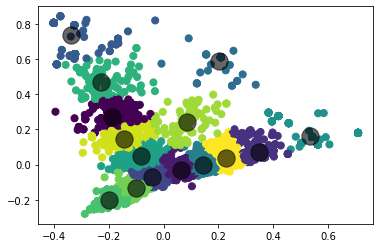

In [291]:
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components = 2)

Y_sklearn = sklearn_pca.fit_transform(X.toarray())
kmeans = KMeans(n_clusters =15, init= 'k-means++', max_iter=600, n_init=1, random_state=42)
fitted =kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c= prediction, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6);

In [292]:
from sklearn.metrics import silhouette_score
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(X, model.labels_, metric='euclidean')))

KMeans Scaled Silhouette Score: 0.041214511407197764


In [293]:
def get_top_keywords(data, clusters, labels, n_terms):
  df = pd.DataFrame(data.todense()).groupby(clusters).mean()

  for i,r in df.iterrows():
    print('\nCluster {}'.format(i))
    print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

get_top_keywords(X, pred, features, 80)  




Cluster 0
specialist,ui,applications,analytics,operations,services,microsoft,hcm,implementation,web,designation,mulesoft,platform,enterprise,software,leader,bangalore,developer,testing,database,solutions,php,engineering,dynamics,crm,mm,automation,salesforce,administrator,big,basis,principal,development,package,product,full,finance,recruiter,aws,analyst,sd,modules,devops,stack,delivery,sales,it,hana,azure,application,fico,j2ee,infrastructure,net,security,test,technology,module,sr,data,cloud,abap,engineer,oracle,manager,tech,functional,associate,team,project,java,support,solution,content,writer,sap,architect,technical,consultant,lead

Cluster 1
contract,joiners,in,editor,css3,india,sharepoint,indesign,amp,male,joiner,designing,pillarmind,wireframe,image,design,site,sketch,walkin,php,invision,professional,position,development,consultant,analyst,art,delhi,product,user,flash,interior,icon,remote,studio,odoo,location,it,seniour,software,game,video,jewelry,apps,principal,experience,associate

In [294]:
label = []
for i in df_job['Job Title'].values:

  vec = vectorizer.transform([i])
  pred = model.predict(vec)
  if pred == 0:
    label.append('DataBase Administrator')
  elif pred == 1:
    label.append('UI Developer') 
  elif pred == 2:
    label.append('Cloud Architect')
  elif pred == 3:
    label.append('Full Stack Web Developer')  
  elif pred == 4:
    label.append('Backend Developer')    
  elif pred ==6:
    label.append('IOS/Android Developer')
  elif pred ==7:
    label.append('Devops/Software Engineer') 
  elif pred ==8:
    label.append('Web Designer') 
  elif pred ==9:
    label.append('Technical Support')  
  elif pred ==10:
    label.append('Devops/Software Engineer') 
  else :
    label.append('Full Stack Web Developer') 
    
df_job['Label']= label
df_job.head(5)


,Job Title,Key Skills,Role,Label
1,Online Bidding Executive,pre sales| closing| software knowledge| clien...,Sales Executive/Officer,Full Stack Web Developer
3,Technical Support,Technical Support,Technical Support Engineer,DataBase Administrator
4,Software Test Engineer -hyderabad,manual testing| test engineering| test cases|...,Testing Engineer,Backend Developer
5,Opening For Adobe Analytics Specialist,adobe experience manager| digital| digital ma...,System Analyst,Cloud Architect
7,Opportunity For Azure Devops Architect For Hy...,TFS| Azure| Git| VSTS| Docker| DynaTrace| Spl...,Technical Architect,Cloud Architect


In [295]:
jobSkills=[]
for i in df_job['Key Skills']:
  jobSkills.append(i.lower())

Xclass = vectorizer.fit_transform(jobSkills)

#X_train,X_test,y_train,y_test = train_test_split(Xclass, label, test_size=0.2, random_state=42)
X_train,X_test,y_train,y_test = train_test_split(Xclass,label, shuffle=False, stratify=None, train_size=0.2)
b=np.array(label)
print(b.shape)


(9841,)


(1968, 3573)

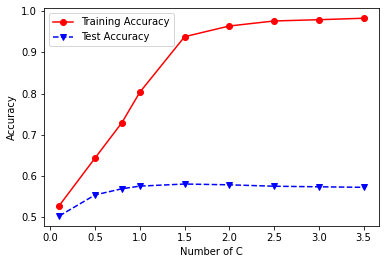

In [300]:
from sklearn.svm import SVC
Csvm =[0.1,0.5,0.8,1,1.5,2,2.5,3,3.5]

trainAcc = []
testAcc = []

for c in Csvm:
  modelsvm = SVC(C=c, gamma =1, kernel= 'rbf')

  svmfit = modelsvm.fit(X_train,y_train)
  Y_predTrain = modelsvm.predict(X_train)
  Y_predTest = modelsvm.predict(X_test)
  trainAcc.append(accuracy_score(y_train, Y_predTrain))
  testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(Csvm, trainAcc, 'ro-',Csvm, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
X_train.shape


In [312]:
svm= SVC(C=5, gamma= 1, kernel= 'rbf',probability=True)
svmfit =svm.fit(X_train, y_train)
svm_predictions = svmfit.predict(X_test)
svm_acc =accuracy_score(y_test,svm_predictions)
print("Accuracy of SVM:" + str(svm_acc))
print(classification_report(y_test, svm_predictions))
X_train.shape


Accuracy of SVM:0.5700495363901943
                          precision    recall  f1-score   support

       Backend Developer       0.36      0.18      0.24       397
         Cloud Architect       0.22      0.10      0.13       646
  DataBase Administrator       0.46      0.20      0.28       860
Devops/Software Engineer       0.68      0.60      0.64       191
Full Stack Web Developer       0.61      0.87      0.72      3962
   IOS/Android Developer       0.47      0.40      0.43      1042
       Technical Support       0.14      0.02      0.03       263
            UI Developer       0.76      0.39      0.51       217
            Web Designer       0.54      0.41      0.46       295

                accuracy                           0.57      7873
               macro avg       0.47      0.35      0.38      7873
            weighted avg       0.52      0.57      0.52      7873



(1968, 3573)

In [314]:
import pickle 
pickle.dump(svmfit,open('weight.pkl','wb'))
import pickle 


classifier = pickle.load(open("/content/weights.pkl", 'rb'))

In [315]:
userInput = input("Enter your skill:")
pred =vectorizer.transform([userInput.lower()])

output = classifier.predict(pred)
print(output[0])
X_train.shape

Enter your skill:java
Full Stack Web Developer


(1968, 3573)

In [316]:
cos =[]
labelData= df_job[df_job['Label'] == output[0]]

for index,row in labelData.iterrows():
   skills =[row['Key Skills']]
   skillVec =vectorizer.transform(skills)
   cos_lib = cosine_similarity(skillVec, pred)
   cos.append(cos_lib[0][0])

labelData['cosine_similarity'] = cos

In [310]:
top_5 =labelData.sort_values('cosine_similarity', ascending = False)[['Job Title',	'Key Skills','Role', 'cosine_similarity']]
top_5.head(5)

,Job Title,Key Skills,Role,cosine_similarity
21345,Core Java - Chennai 3rd Aug Drive,Java,Team Lead/Technical Lead,1.000000
19325,Software Engineering Leads - Machine Learning,Java| C++,Other,1.000000
27295,Senior Java Developer,spring| java,Analyst,0.604943
16669,Java Fullstack Developer_gurgaon_contract,Java| Angularjs,Software Developer,0.570816
20283,Java Developer IT MNC JMD Megapolis Gurgaon S...,hibernate| spring| microservices| core java| ...,Software Developer,0.557398


In [307]:
userInput = input("Enter your skill:")
pred =vectorizer.transform([userInput.lower()])

output = svm.predict(pred)
print("You may look into "+ output[0]+" jobs")
print("Here is a list of jobs that is under"+ output[0])

cos =[]
labelData= df_job[df_job['Label'] == output[0]]

for index,row in labelData.iterrows():
   skills =[row['Key Skills']]
   skillVec =vectorizer.transform(skills)
   cos_lib = cosine_similarity(skillVec, pred)
   cos.append(cos_lib[0][0])

labelData['cosine_similarity'] = cos

top_5 =labelData.sort_values('cosine_similarity', ascending = False)[['Job Title',	'Key Skills','Role']]
top_5.head(5)

Enter your skill:java
You may look into IOS/Android Developer jobs
Here is a list of jobs that is underIOS/Android Developer


,Job Title,Key Skills,Role
1370,Java Full Stack Developer_pune,Java,Software Developer
19991,UI Developer,Java,Software Developer
10699,Java Developer,c++| Core Java| java| c| html,Software Developer
25686,Java Developer,spring| Java| hibernate| core java,Sales/Business Development Manager
14744,Java Developer +3Years Pune Mumbai,Java| hibernate| Spring| core java,Software Developer


In [ ]:
pip install scikit-learn==0.18.2

In [ ]:
pip install -U scikit-learn

In [ ]:
pip install sklearn

In [ ]:
pip install scikit-learn

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_job['Job Title'].values)
print(X.shape)
analyze = vectorizer.build_analyzer()
features = vectorizer.get_feature_names()

In [308]:
userInput = input("Enter your skill:")
pred =vectorizer.transform([userInput.lower()])
output = classifier.predict(pred)
print("You may look into "+ output[0]+" jobs")
print("Here is a list of jobs that is under"+ output[0])

cos =[]
labelData= df_job[df_job['Label'] == output[0]]

for index,row in labelData.iterrows():
   skills =[row['Key Skills']]
   skillVec =vectorizer.transform(skills)
   cos_lib = cosine_similarity(skillVec, pred)
   cos.append(cos_lib[0][0])

labelData['cosine_similarity'] = cos

top_5 =labelData.sort_values('cosine_similarity', ascending = False)[['Job Title',	'Key Skills','Role']]
top_5.head(5)

Enter your skill:java
You may look into Full Stack Web Developer jobs
Here is a list of jobs that is underFull Stack Web Developer


,Job Title,Key Skills,Role
21345,Core Java - Chennai 3rd Aug Drive,Java,Team Lead/Technical Lead
19325,Software Engineering Leads - Machine Learning,Java| C++,Other
27295,Senior Java Developer,spring| java,Analyst
16669,Java Fullstack Developer_gurgaon_contract,Java| Angularjs,Software Developer
20283,Java Developer IT MNC JMD Megapolis Gurgaon S...,hibernate| spring| microservices| core java| ...,Software Developer


In [309]:
userInput = input("Enter your skill:")
pred =vectorizer.transform([userInput.lower()])

output = classifier.predict(pred)
print("You may look into "+ output[0]+" jobs")
print("Here is a list of jobs that is under"+ output[0])

cos =[]
labelData= df_job[df_job['Label'] == output[0]]

for index,row in labelData.iterrows():
   skills =[row['Key Skills']]
   skillVec =vectorizer.transform(skills)
   cos_lib = cosine_similarity(skillVec, pred)
   cos.append(cos_lib[0][0])

labelData['cosine_similarity'] = cos

top_5 =labelData.sort_values('cosine_similarity', ascending = False)[['Job Title',	'Key Skills','Role']]
top_5.head(5)

Enter your skill:java
You may look into Full Stack Web Developer jobs
Here is a list of jobs that is underFull Stack Web Developer


,Job Title,Key Skills,Role
21345,Core Java - Chennai 3rd Aug Drive,Java,Team Lead/Technical Lead
19325,Software Engineering Leads - Machine Learning,Java| C++,Other
27295,Senior Java Developer,spring| java,Analyst
16669,Java Fullstack Developer_gurgaon_contract,Java| Angularjs,Software Developer
20283,Java Developer IT MNC JMD Megapolis Gurgaon S...,hibernate| spring| microservices| core java| ...,Software Developer
